# Input & Label

In [1]:
from rtmag.paper.load import load_input_label, MyModel

In [2]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/12673")
len(input_files), len(label_files)

(389, 389)

In [3]:
idx = 106
input_files[idx]

PosixPath('/mnt/f/isee_dataset/12673/input/input_12673_20170905_000000.npz')

# Model prediction & Label (NLFFF, Potential)

In [4]:
from time import time

In [5]:
# mm = MyModel("/home/mgjeon/space/workspace/base/pino_CC_Hnorm_Unit_2/best_model.pt")
mm = MyModel("/home/mgjeon/space/workspace/base_important/uno_pi_cc_hnorm_unit_aug/model_75.pt")
# mm2 = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/model_60.pt")

Model loaded from epoch 75


In [6]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

1.581021785736084 seconds


In [7]:
start_time = time()
B = mm.get_label(label_files[idx])
print(f"{time() - start_time} seconds")

1.465897798538208 seconds


In [8]:
start_time = time()
Bp = mm.get_pot(label_files[idx])
print(f"{time() - start_time} seconds")

1.5335793495178223 seconds


In [9]:
start_time = time()
dx, dy, dz, dV = mm.get_dV(input_files[idx])
print(f"{time() - start_time} seconds")

0.0034580230712890625 seconds


In [10]:
start_time = time()
x, y, z = mm.get_coords(label_files[idx])
print(f"{time() - start_time} seconds")

0.0061109066009521484 seconds


# Qualitative Evaluation

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [12]:
left_title = "Ground Truth"
right_title = "Prediction"
title_y = 1.10

title_fontsize = 25
bar_title_fontsize = 15
bar_ticks_fontsize = 10

label_fontsize = 12
tick_fontsize = 10

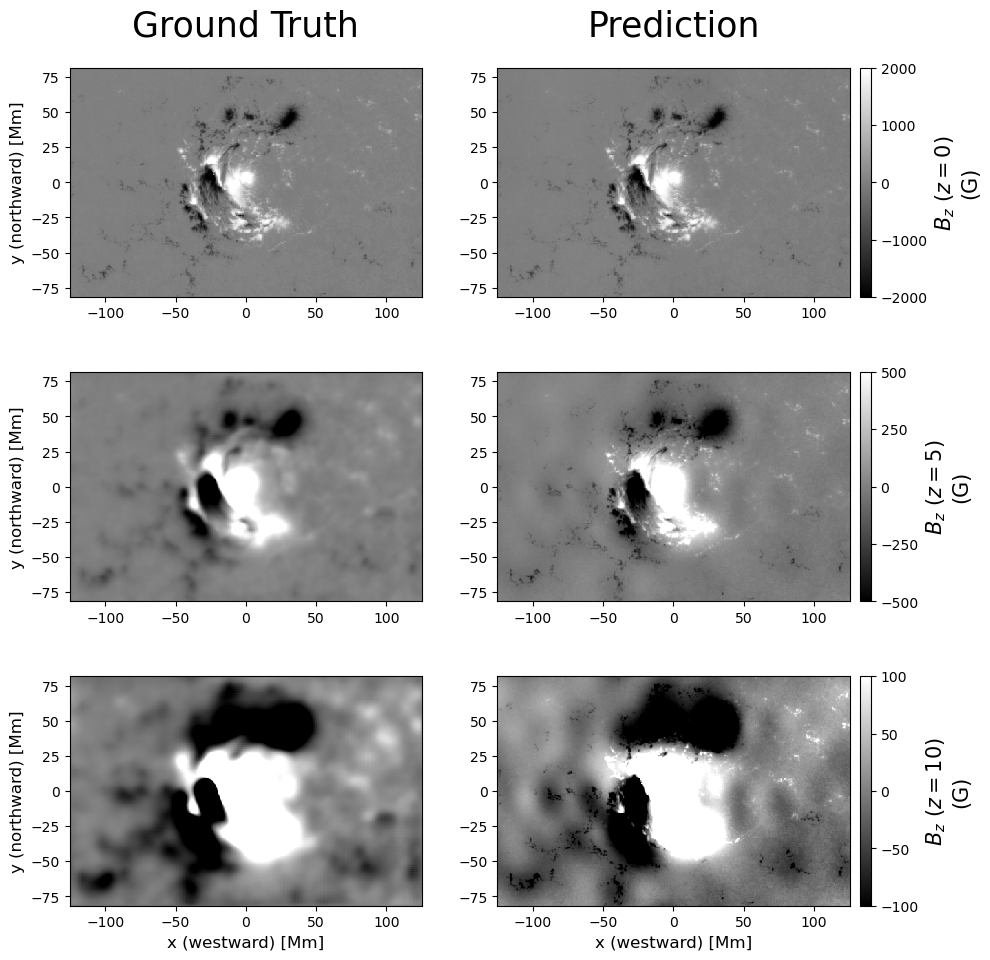

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 0
vmm = 2000
axs[0, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
# axs[0, 0].set_xticks([])
# axs[0, 0].set_yticks([])
# axs[0, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[0, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize)
axs[0, 0].set_aspect("equal")
# axs[0, 0].annotation(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=truth_color, bbox=dict(botsize="square"))

divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].set_xticks([])
# axs[0, 1].set_yticks([])
# axs[0, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize)
axs[0, 1].set_aspect("equal")
# axs[0, 1].annotate(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=pred_color)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)



z = 5
vmm = 500
axs[1, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
# axs[1, 0].set_xticks([])
# axs[1, 0].set_yticks([])
# axs[1, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize)
axs[1, 0].set_aspect("equal")

divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
# axs[1, 1].set_xticks([])
# axs[1, 1].set_yticks([])
# axs[1, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)

# axs[1, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize)
axs[1, 1].set_aspect("equal")
# axs[1, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)




z = 10
vmm = 100
axs[2, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
# axs[2, 0].set_xticks([])
# axs[2, 0].set_yticks([])
axs[2, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize)
axs[2, 0].set_aspect("equal")
# axs[2, 0].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=truth_color, bbox=dict(facecolor='white', alpha=1.0))

divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
# axs[2, 1].set_xticks([])
# axs[2, 1].set_yticks([])
axs[2, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[2, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 1].sharex(axs[0, 1])
axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize)
axs[2, 1].set_aspect("equal")
# axs[2, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)


plt.tight_layout()
plt.show()

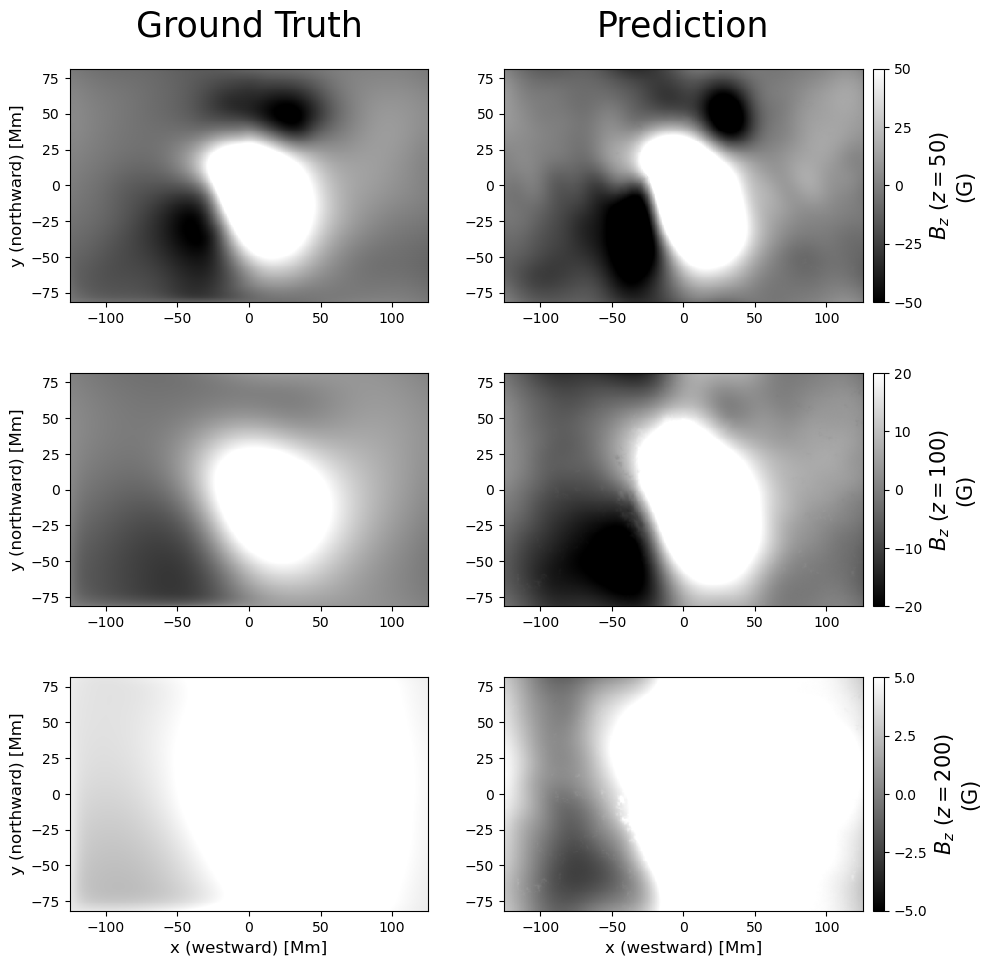

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 50
vmm = 50
axs[0, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
# axs[0, 0].set_xticks([])
# axs[0, 0].set_yticks([])
# axs[0, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[0, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize)
axs[0, 0].set_aspect("equal")
# axs[0, 0].annotation(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=truth_color, bbox=dict(botsize="square"))

divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].set_xticks([])
# axs[0, 1].set_yticks([])
# axs[0, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize)
axs[0, 1].set_aspect("equal")
# axs[0, 1].annotate(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=pred_color)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)



z = 100
vmm = 20
axs[1, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
# axs[1, 0].set_xticks([])
# axs[1, 0].set_yticks([])
# axs[1, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize)
axs[1, 0].set_aspect("equal")

divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
# axs[1, 1].set_xticks([])
# axs[1, 1].set_yticks([])
# axs[1, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)

# axs[1, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize)
axs[1, 1].set_aspect("equal")
# axs[1, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)




z = 200
vmm = 5
axs[2, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
# axs[2, 0].set_xticks([])
# axs[2, 0].set_yticks([])
axs[2, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize)
axs[2, 0].set_aspect("equal")
# axs[2, 0].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=truth_color, bbox=dict(facecolor='white', alpha=1.0))

divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
# axs[2, 1].set_xticks([])
# axs[2, 1].set_yticks([])
axs[2, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[2, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 1].sharex(axs[0, 1])
axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize)
axs[2, 1].set_aspect("equal")
# axs[2, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)


plt.tight_layout()
plt.show()

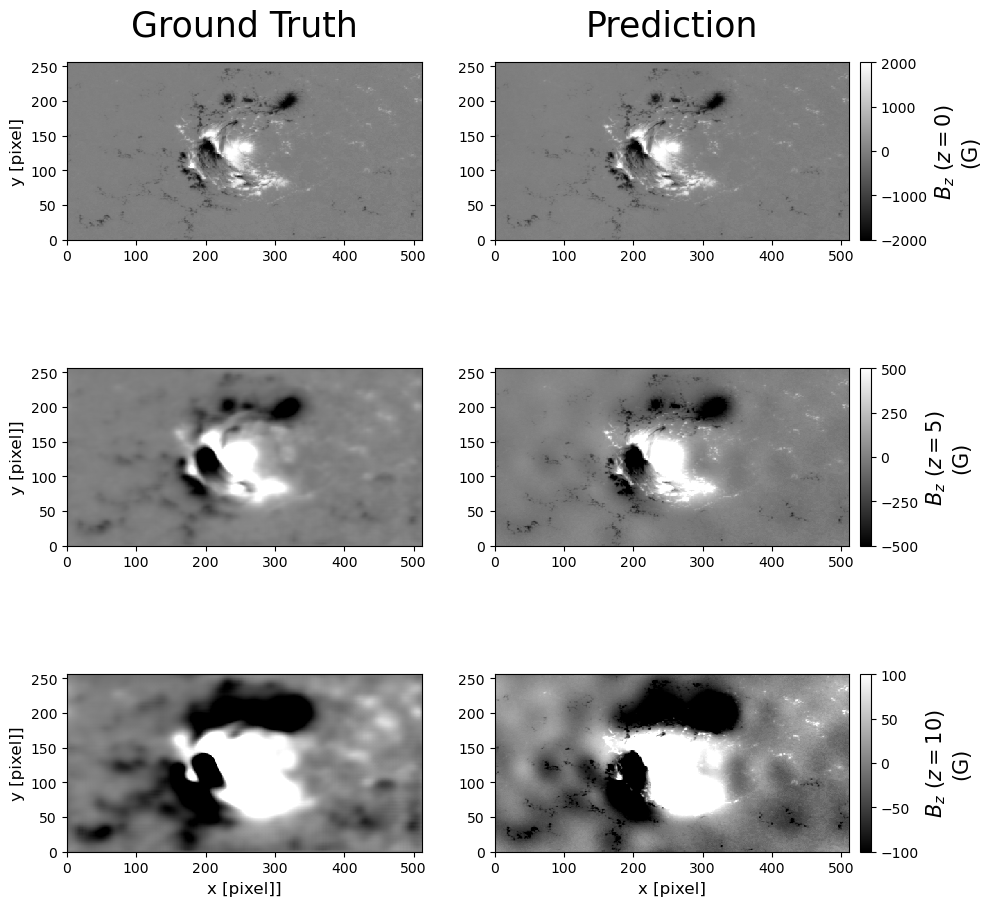

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 0
vmm = 2000
axs[0, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
# axs[0, 0].set_xticks([])
# axs[0, 0].set_yticks([])
# axs[0, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[0, 0].set_ylabel("y [pixel]", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize)
axs[0, 0].set_aspect("equal")
# axs[0, 0].annotation(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=truth_color, bbox=dict(botsize="square"))

divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].set_xticks([])
# axs[0, 1].set_yticks([])
# axs[0, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize)
axs[0, 1].set_aspect("equal")
# axs[0, 1].annotate(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=pred_color)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)



z = 5
vmm = 500
axs[1, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
# axs[1, 0].set_xticks([])
# axs[1, 0].set_yticks([])
# axs[1, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y [pixel]]", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize)
axs[1, 0].set_aspect("equal")

divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
# axs[1, 1].set_xticks([])
# axs[1, 1].set_yticks([])
# axs[1, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)

# axs[1, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize)
axs[1, 1].set_aspect("equal")
# axs[1, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)




z = 10
vmm = 100
axs[2, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
# axs[2, 0].set_xticks([])
# axs[2, 0].set_yticks([])
axs[2, 0].set_xlabel("x [pixel]]", fontsize=label_fontsize)
axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y [pixel]]", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize)
axs[2, 0].set_aspect("equal")
# axs[2, 0].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=truth_color, bbox=dict(facecolor='white', alpha=1.0))

divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
# axs[2, 1].set_xticks([])
# axs[2, 1].set_yticks([])
axs[2, 1].set_xlabel("x [pixel]", fontsize=label_fontsize)
# axs[2, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 1].sharex(axs[0, 1])
axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize)
axs[2, 1].set_aspect("equal")
# axs[2, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)


plt.tight_layout()
plt.show()

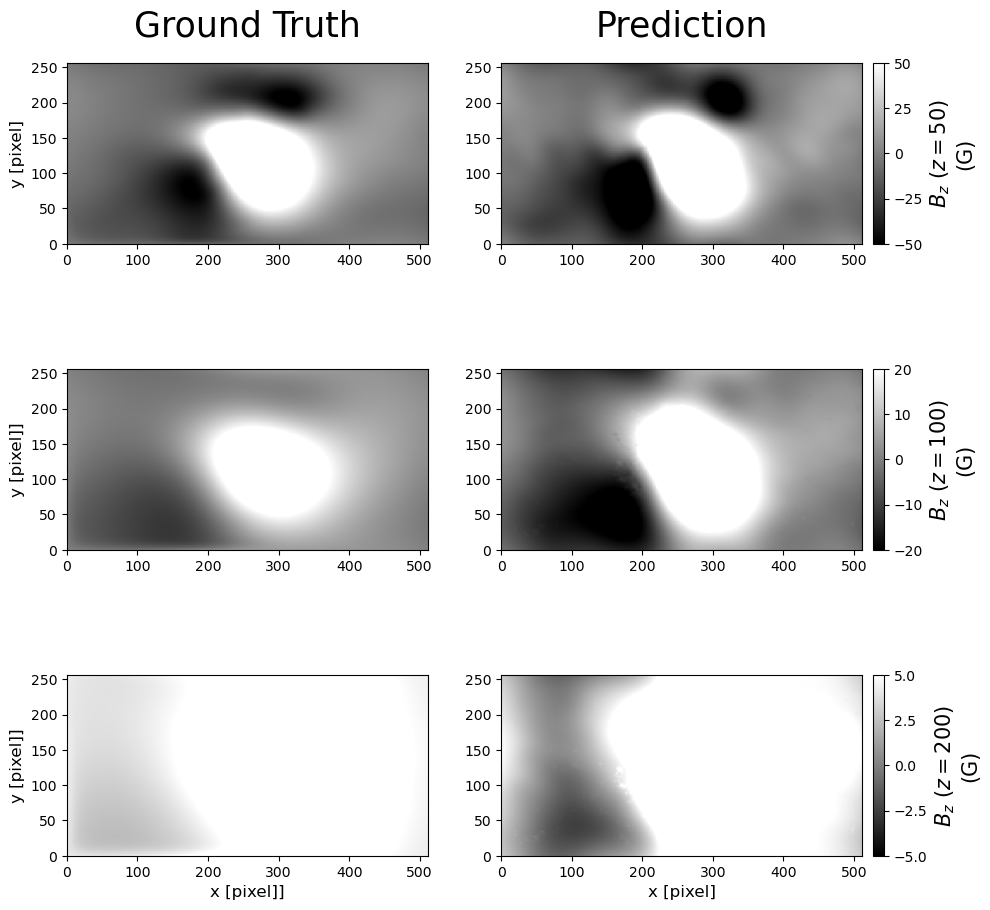

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 50
vmm = 50
axs[0, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
# axs[0, 0].set_xticks([])
# axs[0, 0].set_yticks([])
# axs[0, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[0, 0].set_ylabel("y [pixel]", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize)
axs[0, 0].set_aspect("equal")
# axs[0, 0].annotation(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=truth_color, bbox=dict(botsize="square"))

divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].set_xticks([])
# axs[0, 1].set_yticks([])
# axs[0, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize)
axs[0, 1].set_aspect("equal")
# axs[0, 1].annotate(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=pred_color)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)



z = 100
vmm = 20
axs[1, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
# axs[1, 0].set_xticks([])
# axs[1, 0].set_yticks([])
# axs[1, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y [pixel]]", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize)
axs[1, 0].set_aspect("equal")

divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
# axs[1, 1].set_xticks([])
# axs[1, 1].set_yticks([])
# axs[1, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)

# axs[1, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize)
axs[1, 1].set_aspect("equal")
# axs[1, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)




z = 200
vmm = 5
axs[2, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
# axs[2, 0].set_xticks([])
# axs[2, 0].set_yticks([])
axs[2, 0].set_xlabel("x [pixel]]", fontsize=label_fontsize)
axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y [pixel]]", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize)
axs[2, 0].set_aspect("equal")
# axs[2, 0].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=truth_color, bbox=dict(facecolor='white', alpha=1.0))

divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
# axs[2, 1].set_xticks([])
# axs[2, 1].set_yticks([])
axs[2, 1].set_xlabel("x [pixel]", fontsize=label_fontsize)
# axs[2, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 1].sharex(axs[0, 1])
axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize)
axs[2, 1].set_aspect("equal")
# axs[2, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)


plt.tight_layout()
plt.show()

# aaa

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [109]:
left_title = "Ground Truth"
right_title = "Prediction"
title_y = 1.10

title_fontsize = 25
bar_title_fontsize = 15
bar_ticks_fontsize = 10

label_fontsize = 12
tick_fontsize = 10

xticks = np.linspace(0, 512, 100)

truth_color = 'blue'
pred_color = 'red'
text_fontsize = 15

label_format = f"z ={z:2d}"
label_pos = x[0] + 80*(dx/1e8), y[-1] - 30*(dy/1e8)

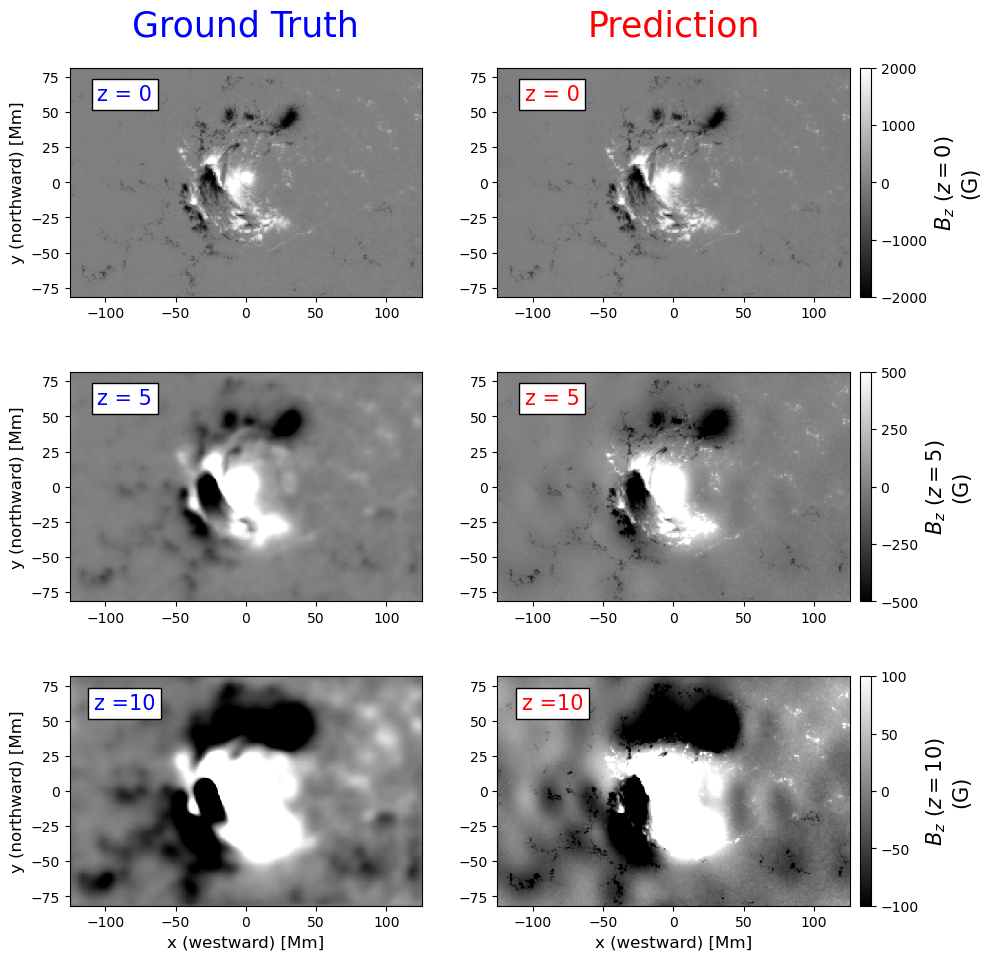

In [110]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 0
vmm = 2000
axs[0, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y, color=truth_color)
# axs[0, 0].set_xticks([])
# axs[0, 0].set_yticks([])
# axs[0, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[0, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize)
axs[0, 0].set_aspect("equal")
# axs[0, 0].annotation(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=truth_color, bbox=dict(botsize="square"))
axs[0, 0].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=truth_color, bbox=dict(facecolor='white', alpha=1.0))

divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y, color=pred_color)
# axs[0, 1].set_xticks([])
# axs[0, 1].set_yticks([])
# axs[0, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize)
axs[0, 1].set_aspect("equal")
# axs[0, 1].annotate(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=pred_color)
axs[0, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)



z = 5
vmm = 500
axs[1, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
# axs[1, 0].set_xticks([])
# axs[1, 0].set_yticks([])
# axs[1, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize)
axs[1, 0].set_aspect("equal")
axs[1, 0].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=truth_color, bbox=dict(facecolor='white', alpha=1.0))

divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
# axs[1, 1].set_xticks([])
# axs[1, 1].set_yticks([])
# axs[1, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)

# axs[1, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize)
axs[1, 1].set_aspect("equal")
axs[1, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)




z = 10
vmm = 100
axs[2, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
# axs[2, 0].set_xticks([])
# axs[2, 0].set_yticks([])
axs[2, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize)
axs[2, 0].set_aspect("equal")
axs[2, 0].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=truth_color, bbox=dict(facecolor='white', alpha=1.0))

divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
# axs[2, 1].set_xticks([])
# axs[2, 1].set_yticks([])
axs[2, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[2, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 1].sharex(axs[0, 1])
axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize)
axs[2, 1].set_aspect("equal")
axs[2, 1].text(label_pos[0],label_pos[1], f"z ={z:2d}", fontsize=text_fontsize, ha="center", va="center", color=pred_color, bbox=dict(facecolor='white', alpha=1.0))

# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)


plt.tight_layout()
plt.show()

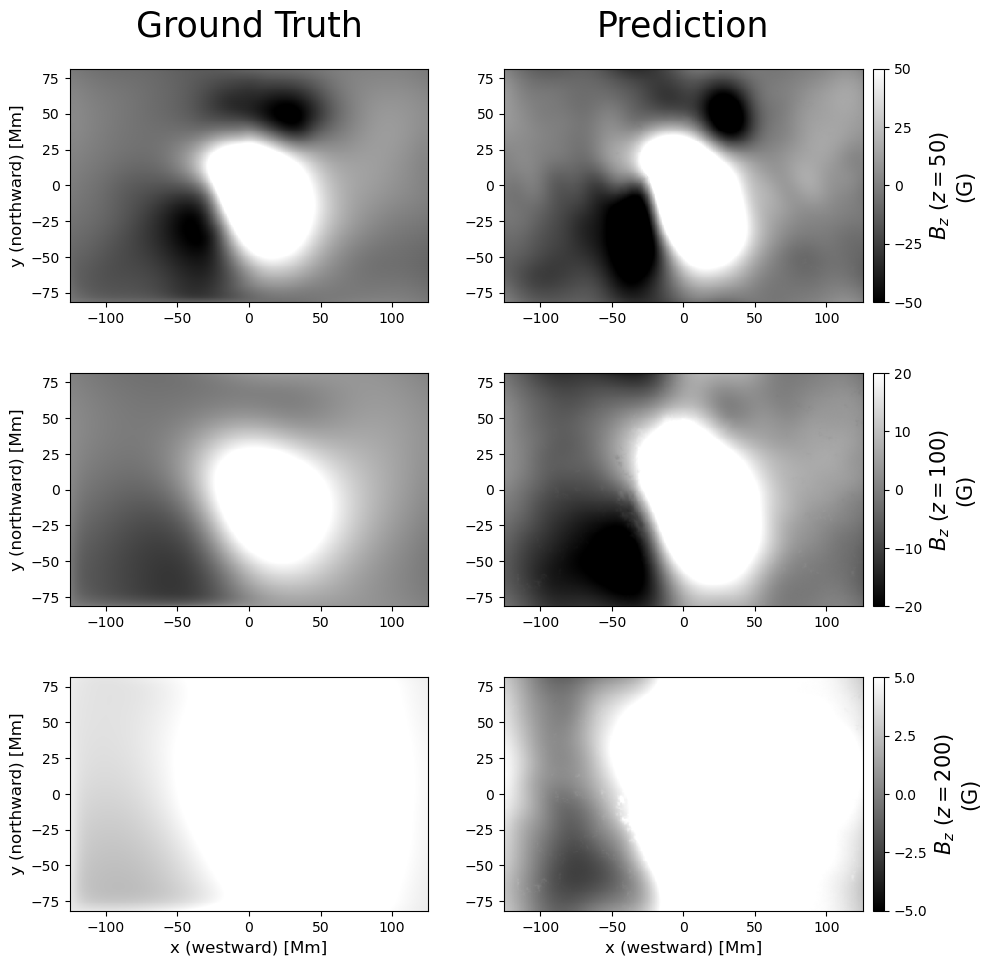

In [111]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 50
vmm = 50
axs[0, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y)
# axs[0, 0].set_xticks([])
# axs[0, 0].set_yticks([])
# axs[0, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[0, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize)
axs[0, 0].set_aspect("equal")
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y)
# axs[0, 1].set_xticks([])
# axs[0, 1].set_yticks([])
# axs[0, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize)
axs[0, 1].set_aspect("equal")
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)



z = 100
vmm = 20
axs[1, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
# axs[1, 0].set_xticks([])
# axs[1, 0].set_yticks([])
# axs[1, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize)
axs[1, 0].set_aspect("equal")
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
# axs[1, 1].set_xticks([])
# axs[1, 1].set_yticks([])
# axs[1, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)

# axs[1, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize)
axs[1, 1].set_aspect("equal")
# cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)




z = 200
vmm = 5
axs[2, 0].pcolormesh(x, y, B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
# axs[2, 0].set_xticks([])
# axs[2, 0].set_yticks([])
axs[2, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[2, 0].sharex(axs[0, 0])
axs[2, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize)
axs[2, 0].set_aspect("equal")
divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(x, y, b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
# axs[2, 1].set_xticks([])
# axs[2, 1].set_yticks([])
axs[2, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[2, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 1].sharex(axs[0, 1])
axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize)
axs[2, 1].set_aspect("equal")
# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)


plt.tight_layout()
plt.show()

# Remainder

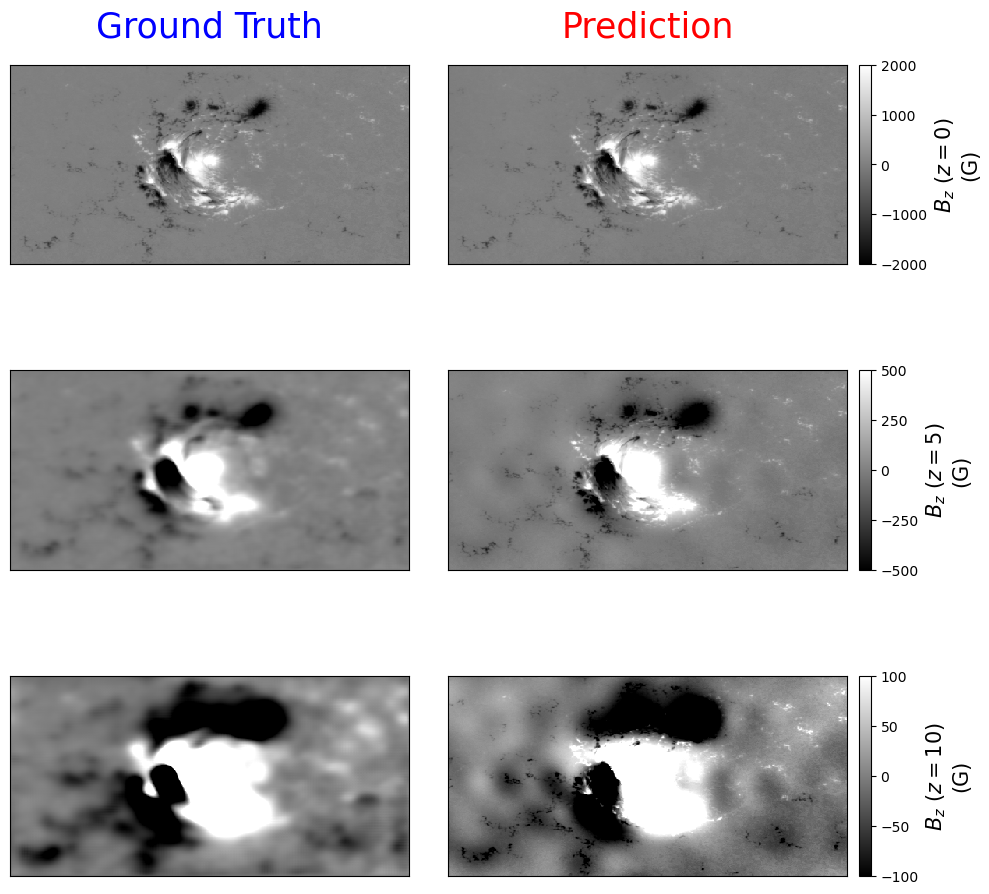

In [81]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 0
vmm = 2000
axs[0, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title(left_title, fontsize=title_fontsize, y=title_y, color=truth_color)
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
# axs[0, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 0].tick_params(labelsize=tick_fontsize)
axs[0, 0].set_aspect("equal")
# axs[0, 0].annotate(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=truth_color)
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[0, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title(right_title, fontsize=title_fontsize, y=title_y, color=pred_color)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
# axs[0, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[0, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[0, 1].sharey(axs[0, 0])
axs[0, 1].tick_params(labelsize=tick_fontsize)
axs[0, 1].set_aspect("equal")
# axs[0, 1].annotate(f"z={z}", xy=(0.10, 0.90), xycoords="axes fraction", fontsize=bar_title_fontsize, ha="center", va="center", color=pred_color)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
cax.tick_params(labelsize=bar_ticks_fontsize)



z = 5
vmm = 500
axs[1, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
# axs[1, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[1, 0].sharex(axs[0, 0])
# axs[1, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 0].tick_params(labelsize=tick_fontsize)
axs[1, 0].set_aspect("equal")
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[1, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
# axs[1, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)

# axs[1, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[1, 1].sharex(axs[0, 1])
axs[1, 1].sharey(axs[1, 0])
axs[1, 1].tick_params(labelsize=tick_fontsize)
axs[1, 1].set_aspect("equal")
# cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)




z = 10
vmm = 100
axs[2, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
# axs[2, 0].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
axs[2, 0].sharex(axs[0, 0])
# axs[2, 0].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 0].tick_params(labelsize=tick_fontsize)
axs[2, 0].set_aspect("equal")
divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")

im = axs[2, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
# axs[2, 1].set_xlabel("x (westward) [Mm]", fontsize=label_fontsize)
# axs[2, 1].set_ylabel("y (northward) [Mm]", fontsize=label_fontsize)
axs[2, 1].sharex(axs[0, 1])
axs[2, 1].sharey(axs[2, 0])
axs[2, 1].tick_params(labelsize=tick_fontsize)
axs[2, 1].set_aspect("equal")
# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="3%", pad="3%")
cb = fig.colorbar(im, cax=cax, ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
cb.set_label('$B_z$ $(z='+f'{z}'+')$\n(G)', size=bar_title_fontsize)
# fig.colorbar(im)


plt.tight_layout()
plt.show()

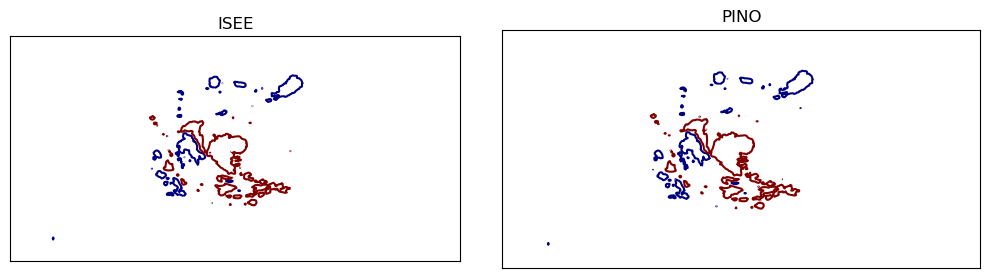

In [24]:
levels = [-1000, 1000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(B[:, :, 0, 2].T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(b[:, :, 0, 2].T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

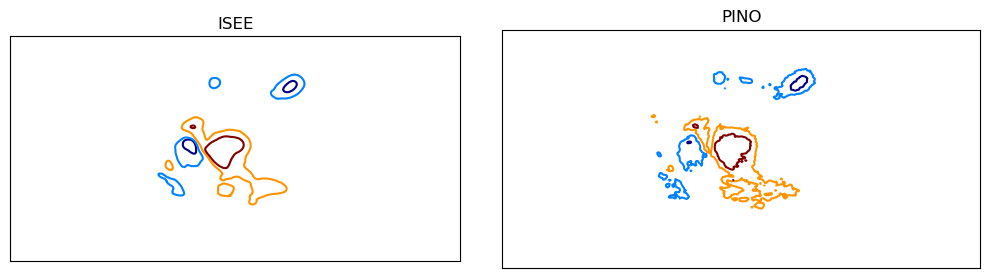

In [25]:
levels = [-1000, -500, 500, 1000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(B[:, :, 5, 2].T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(b[:, :, 5, 2].T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

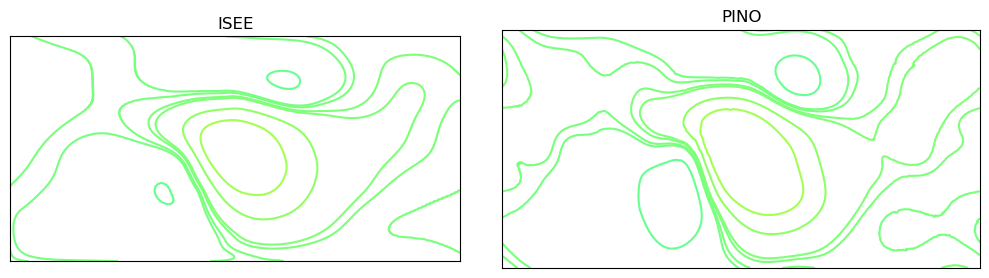

In [26]:
levels = [-1000, -100, -50, -10, -5, 5, 10, 50, 100, 1000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(B[:, :, 50, 2].T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(b[:, :, 50, 2].T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

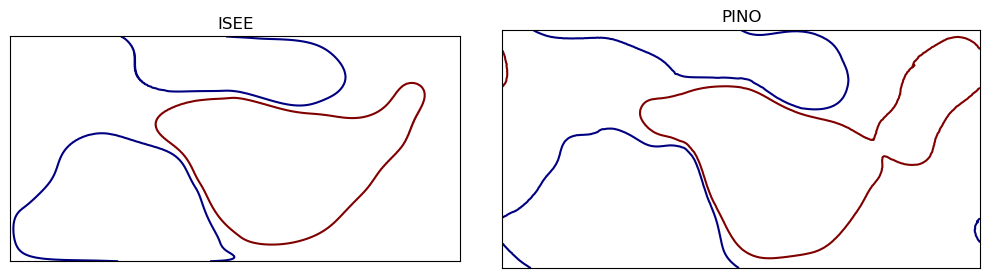

In [72]:
levels = [-10, 10]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(B[:, :, 50, 2].T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(b[:, :, 50, 2].T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

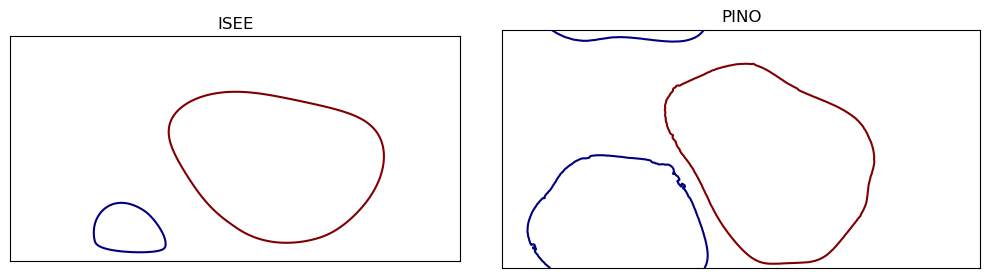

In [59]:
levels = [-10, 10]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(B[:, :, 100, 2].T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(b[:, :, 100, 2].T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

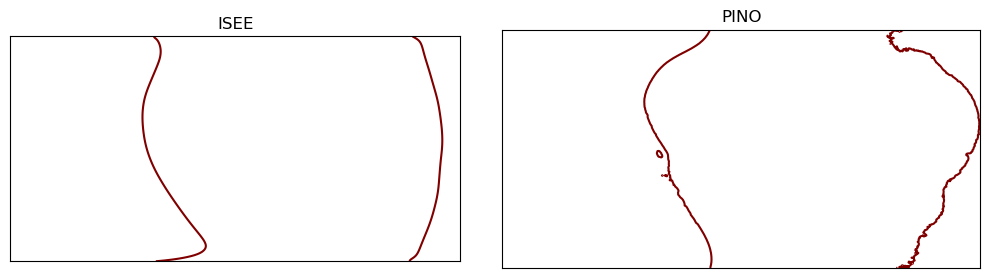

In [71]:
levels = [-5, 5]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(B[:, :, 200, 2].T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(b[:, :, 200, 2].T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()

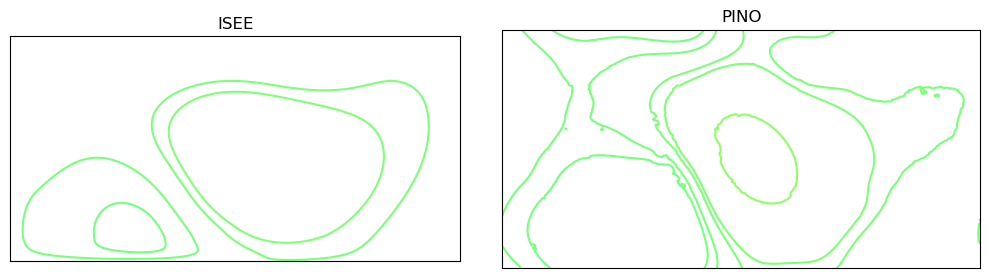

In [27]:
levels = [-1000, -100, -50, -10, -5, 5, 10, 50, 100, 1000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].contour(B[:, :, 100, 2].T, cmap="jet", levels=levels)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].contour(b[:, :, 100, 2].T, cmap="jet", levels=levels)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="3%", pad="3%")
# fig.add_axes(cax)
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])
# fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)')

plt.tight_layout()
plt.show()